In [ ]:
!rm -rf /content/.cache && rm -rf /tmp/*
from google.colab import drive

drive.mount('/content/drive')

!unzip "/content/drive/MyDrive/faces-cropped (2).zip" -d dataset
drive.flush_and_unmount()


Streaming output truncated to the last 5000 lines.
  inflating: dataset/faces-cropped/n007433/0324_01.jpg  
  inflating: dataset/faces-cropped/n007433/0326_02.jpg  
  inflating: dataset/faces-cropped/n007433/0339_03.jpg  
  inflating: dataset/faces-cropped/n007433/0351_01.jpg  
  inflating: dataset/faces-cropped/n007433/0441_01.jpg  
  inflating: dataset/faces-cropped/n007433/0443_01.jpg  
  inflating: dataset/faces-cropped/n007433/0478_02.jpg  
  inflating: dataset/faces-cropped/n007433/0489_01.jpg  
   creating: dataset/faces-cropped/n007497/
  inflating: dataset/faces-cropped/n007497/0005_01.jpg  
  inflating: dataset/faces-cropped/n007497/0012_01.jpg  
  inflating: dataset/faces-cropped/n007497/0014_01.jpg  
  inflating: dataset/faces-cropped/n007497/0034_01.jpg  
  inflating: dataset/faces-cropped/n007497/0067_01.jpg  
  inflating: dataset/faces-cropped/n007497/0069_01.jpg  
  inflating: dataset/faces-cropped/n007497/0077_01.jpg  
  inflating: dataset/faces-cropped/n007497/0098_01

In [ ]:
import gdown
file_id = '1_zI2SvaJmHSqtMR_udIF_ZePgd2TL-zM'
output_file = 'model.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1_zI2SvaJmHSqtMR_udIF_ZePgd2TL-zM
From (redirected): https://drive.google.com/uc?id=1_zI2SvaJmHSqtMR_udIF_ZePgd2TL-zM&confirm=t&uuid=bda855ea-6fa4-4adc-8fb3-f02443d31b42
To: /content/model.zip
100%|██████████| 102M/102M [00:01<00:00, 81.1MB/s] 


'model.zip'

In [ ]:
!unzip model.zip

Archive:  model.zip
 extracting: FaceNet/fingerprint.pb  
 extracting: FaceNet/saved_model.pb  
 extracting: FaceNet/keras_metadata.pb  
 extracting: FaceNet/variables/variables.index  
 extracting: FaceNet/variables/variables.data-00000-of-00001  


In [ ]:
import gdown
file_id = '1QvOlcOqQCeq1r3fegHpE9fnps3h-Aij4'
output_file = 'indianData.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1QvOlcOqQCeq1r3fegHpE9fnps3h-Aij4
To: /content/indianData.zip
100%|██████████| 13.7M/13.7M [00:00<00:00, 78.0MB/s]


'indianData.zip'

In [ ]:
!unzip indianData.zip

y
Archive:  indianData.zip
   creating: faces-cropped/n000010/
  inflating: faces-cropped/n000010/0005_01__face_0.jpg  
  inflating: faces-cropped/n000010/0007_01__face_0.jpg  
  inflating: faces-cropped/n000010/0010_01__face_0.jpg  
  inflating: faces-cropped/n000010/0011_01__face_0.jpg  
  inflating: faces-cropped/n000010/0013_01__face_0.jpg  
  inflating: faces-cropped/n000010/0019_01__face_0.jpg  
  inflating: faces-cropped/n000010/0025_01__face_0.jpg  
  inflating: faces-cropped/n000010/0035_01__face_0.jpg  
  inflating: faces-cropped/n000010/0040_01__face_0.jpg  
  inflating: faces-cropped/n000010/0048_01__face_0.jpg  
  inflating: faces-cropped/n000010/0049_01__face_0.jpg  
  inflating: faces-cropped/n000010/0050_01__face_0.jpg  
  inflating: faces-cropped/n000010/0052_01__face_0.jpg  
  inflating: faces-cropped/n000010/0054_01__face_0.jpg  
  inflating: faces-cropped/n000010/0070_01__face_0.jpg  
  inflating: faces-cropped/n000010/0074_01__face_0.jpg  
  inflating: faces-croppe

In [ ]:
def triplet_loss (y_true, y_pred):
  y_pred = K.l2_normalize(y_pred, axis=0)
  anchor_out = y_pred[:, 0:128]
  positive_out = y_pred[:, 128:256]
  negative_out = y_pred[:, 256:384]
  print(anchor_out.shape)
  pos_dist = K.sum(K.abs(anchor_out-positive_out), axis=1)
  neg_dist = K.sum(K.abs(anchor_out - negative_out), axis=1)
  stacked_distances = K.stack([pos_dist, neg_dist], axis=0)
  probs = K.softmax(stacked_distances, axis=0)
  return K.mean(K.abs (probs [0]) + K.abs (1.0 - probs [1]))

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import pickle
import tensorflow_hub as hub
import random
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import os
from math import floor
import cv2
import pickle
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow


model = load_model('/content/FaceNet',custom_objects={'triplet_loss': triplet_loss})

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:327: UserWarning: model_architecture is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 inception_resnet_v1 (Funct  (None, 128)                  2280814   ['input_2[0][0]',             
 ional)                                                   4          'input_3[0][0]',         

In [ ]:
single_image_input = layers.Input(shape=(160, 160, 3), name='single_image_input')
embedding_output = model.layers[3](single_image_input)
inference_model = Model(inputs = single_image_input, outputs = embedding_output)
inference_model.set_weights(model.get_weights())

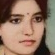

1/1 [==============================] - 0s 99ms/step


In [24]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
from sklearn.preprocessing import Normalizer
l2_normalizer = Normalizer('l2')
image = cv2.imread('mumma 2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
image = image[y:y+h, x:x+w, :]
cv2_imshow(image)
img = cv2.resize(image, (160, 160))
img = np.asarray(img)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)
embed = inference_model.predict(img)
embed = embed[0]
embedNorm = l2_normalizer.transform(np.expand_dims(embed, axis=0))[0]

In [23]:
embedNorm

array([[ 0.10427891,  0.01022485,  0.10752633, -0.15619983, -0.03921628,
         0.05992323,  0.10690707,  0.02197343, -0.04068276,  0.02043106,
        -0.04958426, -0.01036772,  0.12582359,  0.01071146,  0.10124228,
         0.05086383, -0.03541797, -0.03504199,  0.09811793, -0.10066046,
        -0.11844047, -0.01264786, -0.08622606,  0.010786  , -0.07380116,
        -0.0522489 , -0.03764836, -0.0723033 ,  0.00982113,  0.2317595 ,
        -0.02230862, -0.15935099,  0.09475508, -0.05716817,  0.09967707,
        -0.06605642, -0.01630594,  0.13188024, -0.01869645,  0.07938666,
         0.06286718, -0.0226987 , -0.09560014,  0.04936373, -0.07611169,
        -0.00716152, -0.00636936,  0.10051554, -0.00030558, -0.06990267,
         0.03149617,  0.02061805,  0.10727987, -0.13796918,  0.06031395,
        -0.02288365, -0.04387015,  0.0082433 ,  0.13072143, -0.01631373,
        -0.05286601,  0.07078919, -0.09883862,  0.0287433 ,  0.01890456,
        -0.0958029 , -0.07348637, -0.0344191 ,  0.1

ValueError: 'sky blue' is not a valid color value.

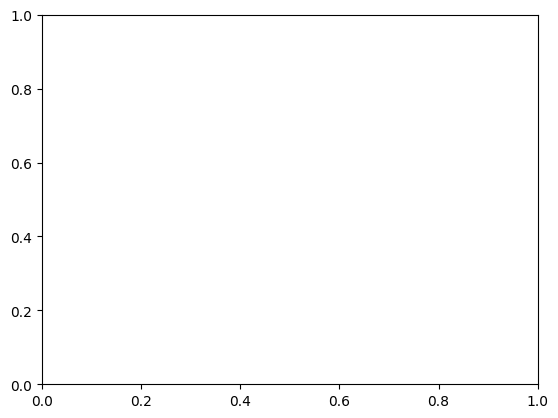

In [ ]:
import matplotlib.pyplot as plt
plt.hist(embed,color='sky blue')
plt.hist(embedNorm,color='light red')
plt.show()

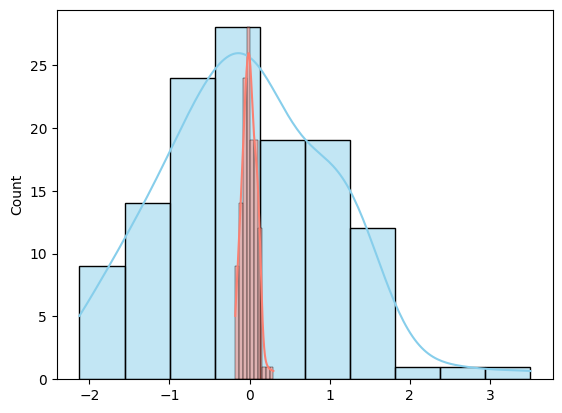

In [ ]:
import seaborn as sns
histplot = sns.histplot(embed, color='skyblue', kde=True, label='Embed')
histplot  = sns.histplot(embedNorm, color='salmon', kde=True, label='EmbedNorm')

In [ ]:
fig = histplot.get_figure()
fig.savefig('my_lineplot.png')

In [ ]:
embed = inference_model.predict()

IndexError: tuple index out of range

In [ ]:
from sklearn.preprocessing import Normalizer
l2_normalizer = Normalizer('l2')
dataDIR =  '/content/dataset/faces-cropped/'

data = []
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classes = os.listdir(dataDIR)
imageTrainArr = []
imageTestArr = []
classesTrain = []
classesTest = []
classes.remove('class_list.txt')

for i in classes:
    path_of_folder = str(dataDIR + i)
    count = 0
    for j in range(2):
      dirImg = os.listdir(path_of_folder)
      opts = len(dirImg)
      index1 = random.randint(0,opts-1)
      index2 = random.randint(0,opts-1)
      imageTrainArr.append(dataDIR + i + '/' + dirImg[index1])
      imageTestArr.append(dataDIR + i + '/' +  dirImg[index2])
      classesTrain.append(i)
      classesTest.append(i)


for i in range(len(imageTrainArr)-1590):
    image = cv2.imread(imageTrainArr[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    try:
      (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
      image = image[y:y+h, x:x+w, :]
    except:
      image = image
    img = cv2.resize(image, (160, 160))
    img = np.asarray(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    classe = classesTrain[i]
    embed = inference_model.predict(img)
    embed = embed[0]
    embed = l2_normalizer.transform(np.expand_dims(embed, axis=0))[0]
    data.append((embed,classe))


with open("FaceDatabase.pkl", "wb") as f:
    pickle.dump(data, f)

correct = 0
incorrect = 0

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
accur = []

with open("FaceDatabase.pkl", "rb") as f:
  data = pickle.load(f)

class_name_and_arrays = data
for i in range(len(imageTestArr)-1590):
    image = cv2.imread(imageTestArr[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    try:
      (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
      image = image[y:y+h, x:x+w, :]
    except:
      image = image
    img = cv2.resize(image, (160, 160))
    img = np.asarray(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    classe = classesTrain[i]
    new_embedding = inference_model.predict(img)
    new_embedding  = new_embedding[0]
    new_embedding = l2_normalizer.transform(np.expand_dims(new_embedding, axis=0))[0]

    highest_similarity = -float('inf')  # Initialize with a negative infinity
    predicted_class_name = None

    for array,class_name in class_name_and_arrays:
      similarity = np.dot(new_embedding, array) / (np.linalg.norm(new_embedding) + np.linalg.norm(array))  # Calculate similarity
      if similarity > highest_similarity:
        highest_similarity = similarity
        predicted_class_name = class_name

    if predicted_class_name == classe:
      correct+=1
    else:
      incorrect+=1
    accur.append(correct/(correct+incorrect)*100)

1/1 [==============================] - 0s 60ms/step


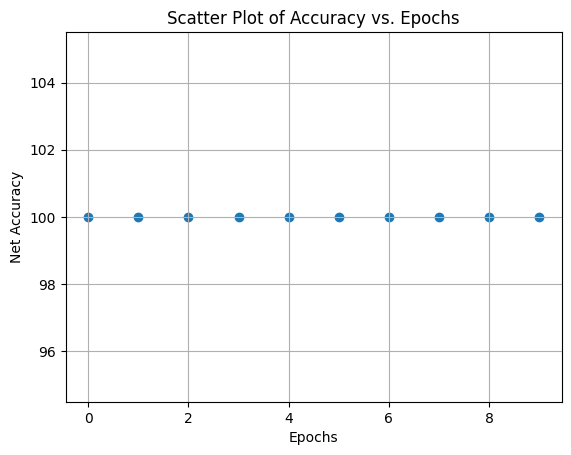

In [ ]:
epoches = list(range(len(imageTestArr)-1590))
plt.scatter(epoches, accur)
plt.xlabel("Epochs")
plt.ylabel("Net Accuracy")
plt.title("Scatter Plot of Accuracy vs. Epochs")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import pickle
import tensorflow_hub as hub
import random
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os
from math import floor
import cv2
import pickle



accur = []
epoches = [15,20]

for epoch in epoches:
    with open('data_test.pkl', 'rb') as f:
        test_df = pickle.load(f)

    with open('data_train.pkl', 'rb') as f:
        train_df = pickle.load(f)

    x_train = train_df['image']
    y_train = train_df['person']

    x_test = test_df['image']
    y_test = test_df['person']

    def remove_extra_dim(image):
        try:
            return np.squeeze(image, axis=0)  # Efficient removal if size 1
        except ValueError:
            # Extra dimension not found, return the original data
            print('failed')
            return image

    # Loop through each image in the Series
    for index, image in x_train.items():  # Access elements using items()
        x_train.loc[index] = remove_extra_dim(image)  # Modify Series in-place

    for index, image in x_test.items():  # Access elements using items()
        x_test.loc[index] = remove_extra_dim(image)  # Modify Series in-place

    x_train[0].shape

    x_train.shape

    classes = set()
    for i in y_train:
      classes.add(i)

    classes = list(classes)
    classes

    def data_generator(batch_size=108):
      while True:
        a = []
        p = []
        n = []
        for _ in range(batch_size):
          found = True
          while(found):
            pos_neg = random.sample(classes, 2)
            try:
              positive_samples = random.sample(list (x_train [y_train==pos_neg [0]]), 2)
              negative_sample= random.choice(list (x_train [y_train == pos_neg [1]]))
              found = False
            except:
              continue
          a.append(positive_samples [0])
          p.append(positive_samples [1])
          n.append(negative_sample)

        yield ([np.array(a), np.array(p), np.array(n)], np.zeros((batch_size, 1)).astype("float32"))

    def triplet_loss (y_true, y_pred):
      anchor_out = y_pred[:, 0:128]
      positive_out = y_pred[:, 128:256]
      negative_out = y_pred[:, 256:384]
      pos_dist = K.sum(K.abs(anchor_out-positive_out), axis=1)
      neg_dist = K.sum(K.abs(anchor_out - negative_out), axis=1)
      stacked_distances = K.stack([pos_dist, neg_dist], axis=0)
      probs = K.softmax(stacked_distances, axis=0)
      return K.mean(K.abs (probs [0]) + K.abs (1.0 - probs [1]))

    input_shape = (224,224,3);
    input_layer = layers.Input(shape=input_shape)
    inception = InceptionV3(weights='imagenet', include_top=False)
    feature_extractor = inception(input_layer)
    for layer in inception.layers:
        layer.trainable = False
    gap_layer = layers.GlobalAveragePooling2D()(feature_extractor)
    fc_layer = layers.Dense(128, activation='relu')(gap_layer)
    l2_norm_layer = layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(fc_layer)
    model = Model(inputs=input_layer, outputs=l2_norm_layer)

    model.summary()

    triplet_model_a = layers.Input((224, 224, 3))
    triplet_model_p = layers.Input((224, 224, 3))
    triplet_model_n = layers.Input((224, 224, 3))
    triplet_model_out = layers.Concatenate()([model (triplet_model_a), model (triplet_model_p), model(triplet_model_n)])
    triplet_model = Model( [triplet_model_a, triplet_model_p, triplet_model_n], triplet_model_out)
    # triplet_model.summary()

    my_optimizer = keras.optimizers.Adam(0.0005)

    triplet_model.compile(loss=triplet_loss, optimizer=my_optimizer)
    print(epoch)
    triplet_model.fit_generator(data_generator(),steps_per_epoch=51,epochs=epoch)

    single_image_input = layers.Input(shape=(224, 224, 3), name='single_image_input')
    embedding_output = triplet_model.layers[3](single_image_input)
    inference_model = Model(inputs = single_image_input, outputs = embedding_output)
    inference_model.set_weights(model.get_weights())
    data = []
    face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    classes = os.listdir('/content/dataset/faces-cropped')
    imageTrainArr = []
    imageTestArr = []
    classesTrain = []
    classesTest = []

    classes.remove('class_list.txt')
    for i in classes:

        path_of_folder = str("/content/dataset/faces-cropped/" + i)
        count = 0
        for j in range(2):
          dirImg = os.listdir(path_of_folder)
          opts = len(dirImg)
          index1 = random.randint(0,opts-1)
          index2 = random.randint(0,opts-1)
          imageTrainArr.append("/content/dataset/faces-cropped/" + i + '/' + dirImg[index1])
          imageTestArr.append("/content/dataset/faces-cropped/" + i + '/' +  dirImg[index2])
          classesTrain.append(i)
          classesTest.append(i)


    for i in range(len(imageTrainArr)-1200):
        image = cv2.imread(imageTrainArr[i])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        try:
          (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
          image = image[y:y+h, x:x+w, :]
        except:
          image = image
        img = cv2.resize(image, (224, 224))
        img = np.asarray(img)
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)
        classe = classesTrain[i]
        embed = inference_model.predict(img)
        data.append((embed[0],classe))


    with open("FaceDatabase.pkl", "wb") as f:
        pickle.dump(data, f)

    correct = 0
    incorrect = 0

    import matplotlib.pyplot as plt
    from google.colab.patches import cv2_imshow

    with open("FaceDatabase.pkl", "rb") as f:
      data = pickle.load(f)

    class_name_and_arrays = data
    for i in range(len(imageTestArr)-1200):
        image = cv2.imread(imageTestArr[i])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        try:
          (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
          image = image[y:y+h, x:x+w, :]
        except:
          image = image
        img = cv2.resize(image, (224, 224))
        img = np.asarray(img)
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)
        classe = classesTrain[i]
        new_embedding = inference_model.predict(img)

        highest_similarity = -float('inf')  # Initialize with a negative infinity
        predicted_class_name = None

        for array,class_name in class_name_and_arrays:
          similarity = np.dot(new_embedding, array) / (np.linalg.norm(new_embedding) + np.linalg.norm(array))  # Calculate similarity
          if similarity > highest_similarity:
            highest_similarity = similarity
            predicted_class_name = class_name

        if predicted_class_name == classe:
          correct+=1
        else:
          incorrect+=1
    accur.append(correct/(correct+incorrect))
    print(accur)


plt.scatter(epoches, accur)
plt.xlabel("Epochs")
plt.ylabel("Net Accuracy")
plt.title("Scatter Plot of Accuracy vs. Epochs")
plt.grid(True)
plt.show()






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 lambda (Lambda)             (None, 128)               0         
                                                                 
Total params: 22065056 (84.17 MB)
Trainable params: 262272 (1

<ipython-input-1-20beeae02f0a>:116: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  triplet_model.fit_generator(data_generator(),steps_per_epoch=51,epochs=epoch)


Epoch 1/15
51/51 [==============================] - ETA: 0s - loss: 0.5368

In [ ]:
#testing pretrained
from architecture import *
inference_model = InceptionResNetV2()
import cv2
import numpy as np
import os
import random
import pickle

from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/MyDrive/FaceNet David/facenet_keras_weights.h5' /content
drive.flush_and_unmount()

inference_model.load_weights('/content/facenet_keras_weights.h5')



data = []
face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
classes = os.listdir('/content/dataset/faces-cropped')
imageTrainArr = []
imageTestArr = []
classesTrain = []
classesTest = []

classes.remove('class_list.txt')
for i in classes:
    path_of_folder = str("/content/dataset/faces-cropped/" + i)
    count = 0
    for j in range(2):
      dirImg = os.listdir(path_of_folder)
      opts = len(dirImg)
      index1 = random.randint(0,opts-1)
      index2 = random.randint(0,opts-1)
      imageTrainArr.append("/content/dataset/faces-cropped/" + i + '/' + dirImg[index1])
      imageTestArr.append("/content/dataset/faces-cropped/" + i + '/' +  dirImg[index2])
      classesTrain.append(i)
      classesTest.append(i)

for i in range(len(imageTrainArr)-1200):
    image = cv2.imread(imageTrainArr[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    try:
      (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
      image = image[y:y+h, x:x+w, :]
    except:
      image = image
    img = cv2.resize(image, (160, 160))
    img = np.asarray(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    classe = classesTrain[i]
    embed = inference_model.predict(img)
    data.append((embed[0],classe))


with open("FaceDatabase.pkl", "wb") as f:
    pickle.dump(data, f)

correct = 0
incorrect = 0

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

with open("FaceDatabase.pkl", "rb") as f:
  data = pickle.load(f)

class_name_and_arrays = data
for i in range(len(imageTestArr)-1600):
    image = cv2.imread(imageTestArr[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    try:
      (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
      image = image[y:y+h, x:x+w, :]
    except:
      image = image
    img = cv2.resize(image, (160, 160))
    img = np.asarray(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    classe = classesTrain[i]
    new_embedding = inference_model.predict(img)

    highest_similarity = -float('inf')  # Initialize with a negative infinity
    predicted_class_name = None

    for array,class_name in class_name_and_arrays:
      similarity = np.dot(new_embedding, array) / (np.linalg.norm(new_embedding) + np.linalg.norm(array))  # Calculate similarity
      if similarity > highest_similarity:
        highest_similarity = similarity
        predicted_class_name = class_name

    if predicted_class_name == classe:
      correct+=1
    else:
      incorrect+=1
print("Accuray: ",(correct/(correct+incorrect))*100," %")

Mounted at /content/drive
1/1 [==============================] - 0s 94ms/step


ZeroDivisionError: division by zero

In [ ]:
model_path = "/content"
tf.keras.models.save_model(triplet_model,model_path)
triplet_model.save('facenetep7.h5',save_format='h5')

from google.colab import drive
drive.mount('/content/drive')

!cp /content/facenetep7.h5 /content/drive/MyDrive
!mkdir FaceNet
!mkdir FaceNet/variables
!cp /content/fingerprint.pb /content/FaceNet
!cp /content/keras_metadata.pb /content/FaceNet
!cp /content/saved_model.pb /content/FaceNet
!cp /content/variables/variables.data-00000-of-00001 /content/FaceNet/variables
!cp /content/variables/variables.index /content/FaceNet/variables

import os
from zipfile import ZipFile
with ZipFile("FaceNetep7.zip",'w') as zip_file:
  for root,_,files in os.walk('/content/FaceNet'):
    for filer in files:
      filepath = os.path.join(root,filer)
      zip_file.write(filepath,os.path.relpath(filepath,'/content/FaceNetep7'))

print('success!')

!cp /content/FaceNetep7.zip /content/drive/MyDrive
drive.flush_and_unmount()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import gdown

file_id = '1-43_OAbzrmDrh7wXSdXP8UtKdd5Exm04'
output_file = 'model.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-43_OAbzrmDrh7wXSdXP8UtKdd5Exm04
From (redirected): https://drive.google.com/uc?id=1-43_OAbzrmDrh7wXSdXP8UtKdd5Exm04&confirm=t&uuid=186d77af-3d66-4c2f-970a-983ff2395e7f
To: /content/model.zip
100%|██████████| 97.4M/97.4M [00:00<00:00, 142MB/s]


'model.zip'

In [ ]:
!unzip model.zip

Archive:  model.zip
 extracting: keras_metadata.pb       
 extracting: fingerprint.pb          
 extracting: saved_model.pb          
 extracting: variables/variables.index  
 extracting: variables/variables.data-00000-of-00001  


In [ ]:
# !unzip "/content/drive/MyDrive/FaceNetep10.zip" -d facenet

unzip:  cannot find or open /content/drive/MyDrive/FaceNetep10.zip, /content/drive/MyDrive/FaceNetep10.zip.zip or /content/drive/MyDrive/FaceNetep10.zip.ZIP.


In [ ]:
!unzip "/content/drive/MyDrive/faces-cropped (2).zip" -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/faces-cropped/n007433/0324_01.jpg  
  inflating: dataset/faces-cropped/n007433/0326_02.jpg  
  inflating: dataset/faces-cropped/n007433/0339_03.jpg  
  inflating: dataset/faces-cropped/n007433/0351_01.jpg  
  inflating: dataset/faces-cropped/n007433/0441_01.jpg  
  inflating: dataset/faces-cropped/n007433/0443_01.jpg  
  inflating: dataset/faces-cropped/n007433/0478_02.jpg  
  inflating: dataset/faces-cropped/n007433/0489_01.jpg  
   creating: dataset/faces-cropped/n007497/
  inflating: dataset/faces-cropped/n007497/0005_01.jpg  
  inflating: dataset/faces-cropped/n007497/0012_01.jpg  
  inflating: dataset/faces-cropped/n007497/0014_01.jpg  
  inflating: dataset/faces-cropped/n007497/0034_01.jpg  
  inflating: dataset/faces-cropped/n007497/0067_01.jpg  
  inflating: dataset/faces-cropped/n007497/0069_01.jpg  
  inflating: dataset/faces-cropped/n007497/0077_01.jpg  
  inflating: dataset/faces-cropped/n007497/0098_01

In [ ]:
drive.flush_and_unmount()

In [ ]:
import numpy as np
import cv2
import pickle
import tensorflow as tf
import pandas as pd
from keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from google.colab.patches import cv2_imshow

def triplet_loss (y_true, y_pred):
  anchor_out = y_pred[:, 0:128]
  positive_out = y_pred[:, 128:256]
  negative_out = y_pred[:, 256:384]
  pos_dist = K.sum(K.abs(anchor_out-positive_out), axis=1)
  neg_dist = K.sum(K.abs(anchor_out - negative_out), axis=1)
  stacked_distances = K.stack([pos_dist, neg_dist], axis=0)
  probs = K.softmax(stacked_distances, axis=0)
  return K.mean(K.abs (probs [0]) + K.abs (1.0 - probs [1]))

model = load_model('/content', custom_objects={'triplet_loss': triplet_loss})

In [ ]:
single_image_input = layers.Input(shape=(224, 224, 3), name='single_image_input')
embedding_output = model.layers[3](single_image_input)
inference_model = Model(inputs = single_image_input, outputs = embedding_output)
inference_model.set_weights(model.get_weights())
data = []

In [ ]:
#dealing with dataset
import os
from math import floor
import cv2
import random
import numpy as np

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
classes = os.listdir('/content/dataset/faces-cropped')
imageTrainArr = []
imageTestArr = []
classesTrain = []
classesTest = []

classes.remove('class_list.txt')
for i in classes:

    path_of_folder = str("/content/dataset/faces-cropped/" + i)
    count = 0
    for j in range(2):
      dirImg = os.listdir(path_of_folder)
      opts = len(dirImg)
      index1 = random.randint(0,opts-1)
      index2 = random.randint(0,opts-1)
      imageTrainArr.append("/content/dataset/faces-cropped/" + i + '/' + dirImg[index1])
      imageTestArr.append("/content/dataset/faces-cropped/" + i + '/' +  dirImg[index2])
      classesTrain.append(i)
      classesTest.append(i)


for i in range(len(imageTrainArr)):
    print(imageTrainArr[i])
    image = cv2.imread(imageTrainArr[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    try:
      (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
      image = image[y:y+h, x:x+w, :]
    except:
      image = image
    img = cv2.resize(image, (224, 224))
    img = np.asarray(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    classe = classesTrain[i]
    embed = inference_model.predict(img)
    data.append((embed[0],classe))


/content/dataset/faces-cropped/n001456/0135_01.jpg
1/1 [==============================] - 0s 26ms/step
/content/dataset/faces-cropped/n001456/0103_01.jpg
1/1 [==============================] - 0s 26ms/step
/content/dataset/faces-cropped/n003984/0114_01.jpg
1/1 [==============================] - 0s 99ms/step
/content/dataset/faces-cropped/n003984/0119_01.jpg
1/1 [==============================] - 0s 42ms/step
/content/dataset/faces-cropped/n001036/0352_03.jpg
1/1 [==============================] - 0s 58ms/step
/content/dataset/faces-cropped/n001036/0264_02.jpg
1/1 [==============================] - 0s 48ms/step
/content/dataset/faces-cropped/n006268/0230_01.jpg
1/1 [==============================] - 0s 49ms/step
/content/dataset/faces-cropped/n006268/0702_01.jpg
1/1 [==============================] - 0s 52ms/step
/content/dataset/faces-cropped/n008485/0153_01.jpg
1/1 [==============================] - 0s 49ms/step
/content/dataset/faces-cropped/n008485/0051_01.jpg
1/1 [=================

In [ ]:
with open("FaceDatabase.pkl", "wb") as f:
    pickle.dump(data, f)

1/1 [==============================] - 0s 50ms/step
accuracy :  0.0 %
1/1 [==============================] - 0s 52ms/step
accuracy :  0.0 %
1/1 [==============================] - 0s 49ms/step
accuracy :  0.0 %
1/1 [==============================] - 0s 51ms/step
accuracy :  25.0 %
1/1 [==============================] - 0s 50ms/step
accuracy :  20.0 %
1/1 [==============================] - 0s 51ms/step
accuracy :  16.666666666666664 %
1/1 [==============================] - 0s 52ms/step
accuracy :  28.57142857142857 %
1/1 [==============================] - 0s 31ms/step
accuracy :  25.0 %
1/1 [==============================] - 0s 39ms/step
accuracy :  22.22222222222222 %
1/1 [==============================] - 0s 31ms/step
accuracy :  20.0 %
1/1 [==============================] - 0s 29ms/step
accuracy :  18.181818181818183 %
1/1 [==============================] - 0s 29ms/step
accuracy :  16.666666666666664 %
1/1 [==============================] - 0s 30ms/step
accuracy :  23.076923076923077 

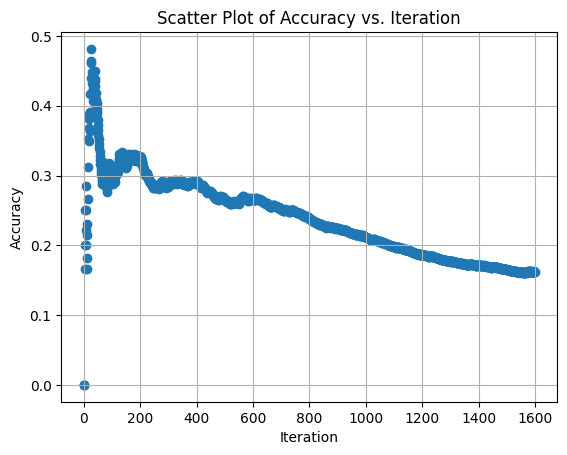

In [ ]:
correct = 0
incorrect = 0

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

with open("FaceDatabase.pkl", "rb") as f:
  data = pickle.load(f)

class_name_and_arrays = data
accur = []
for i in range(len(imageTestArr)):
    image = cv2.imread(imageTestArr[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    try:
      (x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
      image = image[y:y+h, x:x+w, :]
    except:
      image = image
    img = cv2.resize(image, (224, 224))
    img = np.asarray(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    classe = classesTrain[i]
    new_embedding = inference_model.predict(img)

    highest_similarity = -float('inf')  # Initialize with a negative infinity
    predicted_class_name = None

    for array,class_name in class_name_and_arrays:
      similarity = np.dot(new_embedding, array) / (np.linalg.norm(new_embedding) + np.linalg.norm(array))  # Calculate similarity
      if similarity > highest_similarity:
        highest_similarity = similarity
        predicted_class_name = class_name

    if predicted_class_name == classe:
      correct+=1
    else:
      incorrect+=1
    print("accuracy : ", (correct/(correct +incorrect))*100, "%")
    accur.append(correct/(correct+incorrect))

plt.scatter(range(len(accur)), accur)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Scatter Plot of Accuracy vs. Iteration")
plt.grid(True)
plt.show()


In [ ]:
accuracy = correct/(correct+incorrect)
incorrect

1340

In [ ]:
correct

260

In [ ]:
import cv2
import numpy as np
import pickle


def draw_boundary(img, classifier, scaleFactor, minNeighbors, color, name):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features = classifier.detectMultiScale(gray_img, scaleFactor, minNeighbors)
    for (x,y,w,h) in features:
        cv2.rectangle(img, (x,y), (x+w,y+h), color, 2 )
        cv2.putText(img, name, (int(x), int(y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 1, cv2.LINE_AA)


with open("FaceDatabase.pkl", "rb") as f:
    data = pickle.load(f)

class_name_and_arrays = data
path = input('image: ')
path_of_img = path
image = cv2.imread(path_of_img)
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(x, y, w, h) = face_classifier.detectMultiScale(gray, 1.3, 5)[0]
image = image[y:y+h, x:x+w, :]
img = cv2.resize(image, (224, 224))
cv2_imshow(img)
img = np.asarray(img)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)
new_embedding = inference_model.predict(img)
new_embedding = new_embedding[0]

highest_similarity = -float('inf')  # Initialize with a negative infinity
predicted_class_name = None

# Load the model with custom loss function
d = []
for array,class_name in class_name_and_arrays:
  d.append(array)

arr1 = d[0]
arr2 = d[1]

ssr = 0
for i in range(len(arr1)):
  ssr = ssr+(arr1[i]-arr2[i])**2

print('ssr loss: ',ssr)

for array,class_name in class_name_and_arrays:
    similarity = np.dot(new_embedding, array) / (np.linalg.norm(new_embedding) + np.linalg.norm(array))  # Calculate similarity
    print('For ',class_name,' similarity score is: ',similarity)
    if similarity > highest_similarity:
        highest_similarity = similarity
        predicted_class_name = class_name


print(highest_similarity)
print(f"Predicted class name for the new image: {predicted_class_name}")

KeyboardInterrupt: Interrupted by user

In [ ]:
img = cv2.imread('AgyaatHamlawar.png')
cv2_imshow(img)